In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from itertools import combinations_with_replacement

data_df = pd.read_csv('R_IP_vs_Parameters.csv')
rs_root = 2020

In [38]:
def draw_regplot(suffix:str, y_data:np.ndarray, y_pred:np.ndarray):
    sns.set_theme(style="ticks")
    plt.figure()
    g = sns.regplot(
        x=y_data, 
        y=y_pred, 
        ci=None,

        scatter_kws={
            "alpha": 0.8,
            "color": "#7F7F7F",
            "label": "Prediction Data",
            "edgecolor": "black",
            "s": 50,
        },  
        line_kws={"color": "#7F7F7F", "linestyle": "-", "zorder": 2, "alpha":0.5},  # 设置回归线样式
    )

    g.plot([25, y_data.max()+1], [25, y_data.max()+1], color="grey", linestyle="--", linewidth=2, zorder=1, alpha=0.25)

    g.set_xlim(25, y_data.max()+1)
    g.set_ylim(25, y_data.max()+1)
    g.set_xlabel("")
    g.set_ylabel("")
    sns.despine(g.figure)

    g.figure.savefig(f"MLR_on_R_IP_{suffix}.png", dpi=500, bbox_inches="tight")
    plt.close()


0.902
2.009
2.497


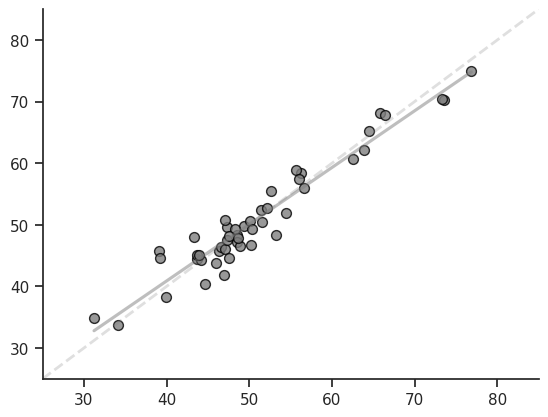

In [39]:
from sklearn.model_selection import KFold

data_kfold_df = data_df.copy(deep=True)
data_kfold_df["ESOMO * BV(r=3)"] = data_kfold_df["ESOMO"] * data_kfold_df["BV(r=3)"]
data_kfold_selected_df = data_kfold_df.loc[:, ["RIP", "BV(r=3)", "ΔGCu-III", "Red.", "VIP", "ESOMO * BV(r=3)"]].copy()

X = np.array(data_kfold_selected_df.drop(['RIP'], axis=1))
Y = np.array(data_kfold_selected_df['RIP'])


kf = KFold(n_splits=5, shuffle=True, random_state=rs_root)
r2_scores = []
mae_scores = []
rmse_scores = []
Y_tests = np.array([])
Y_preds = np.array([])

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    Y_preds = np.append(Y_preds, Y_pred)
    Y_tests = np.append(Y_tests, Y_test)

    r2_scores.append(r2_score(Y_test, Y_pred))
    # print("R-mean_r2_score in round{:} fold{:}: {:.3f}".format(rs,fold+1,r2_score(Y_test, Y_pred)))
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))
    rmse_scores.append(root_mean_squared_error(Y_test, Y_pred))

sns.set_theme(style="ticks")

print(f"{np.array(r2_scores).mean():.3f}")
print(f"{np.array(mae_scores).mean():.3f}")
print(f"{np.array(rmse_scores).mean():.3f}")

g = sns.regplot(
    x=Y_tests, 
    y=Y_preds, 
    ci=None,

    scatter_kws={
        "alpha": 0.8,
        "color": "#7F7F7F",
        "label": "Prediction Data",
        "edgecolor": "black",
        "s": 50,
    },  
    line_kws={"color": "#7F7F7F", "linestyle": "-", "zorder": 2, "alpha":0.5},  # 设置回归线样式
)

g.plot([25, 85], [25, 85], color="grey", linestyle="--", linewidth=2, zorder=1, alpha=0.25)

g.set_xlim(25, 85)
g.set_ylim(25, 85)
g.set_xlabel("")
g.set_ylabel("")
sns.despine(g.figure)

g.figure.savefig("MLR_on_R_IP_all_components_previous_5-fold_cv.png", dpi=500, bbox_inches="tight")

0.927
1.980
2.556


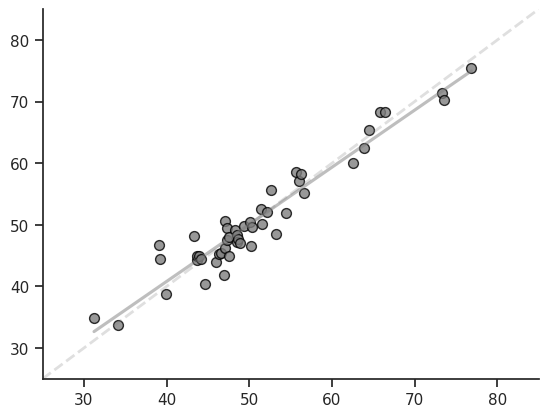

In [40]:
from sklearn.model_selection import LeaveOneOut

data_kfold_df = data_df.copy(deep=True)
data_kfold_df["ESOMO * BV(r=3)"] = data_kfold_df["ESOMO"] * data_kfold_df["BV(r=3)"]
data_kfold_selected_df = data_kfold_df.loc[:, ["RIP", "BV(r=3)", "ΔGCu-III", "Red.", "VIP", "ESOMO * BV(r=3)"]].copy()

X = np.array(data_kfold_selected_df.drop(['RIP'], axis=1))
Y = np.array(data_kfold_selected_df['RIP'])


loo = LeaveOneOut()
Y_tests = np.array([])
Y_preds = np.array([])

for fold, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    Y_preds = np.append(Y_preds, Y_pred)
    Y_tests = np.append(Y_tests, Y_test)

print(f"{r2_score(Y_tests, Y_preds):.3f}")
print(f"{mean_absolute_error(Y_tests, Y_preds):.3f}")
print(f"{root_mean_squared_error(Y_tests, Y_preds):.3f}")

sns.set_theme(style="ticks")

g = sns.regplot(
    x=Y_tests, 
    y=Y_preds, 
    ci=None,

    scatter_kws={
        "alpha": 0.8,
        "color": "#7F7F7F",
        "label": "Prediction Data",
        "edgecolor": "black",
        "s": 50,
    },  
    line_kws={"color": "#7F7F7F", "linestyle": "-", "zorder": 2, "alpha":0.5},  # 设置回归线样式
)

g.plot([25, 85], [25, 85], color="grey", linestyle="--", linewidth=2, zorder=1, alpha=0.25)

g.set_xlim(25, 85)
g.set_ylim(25, 85)
g.set_xlabel("")
g.set_ylabel("")
sns.despine(g.figure)

g.figure.savefig("MLR_on_R_IP_all_components_previous_loo_cv.png", dpi=500, bbox_inches="tight")

0.908
2.009
2.482


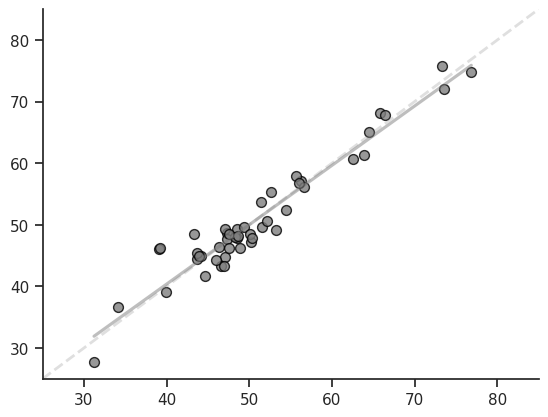

In [41]:
data_kfold_df = data_df.copy(deep=True)
data_kfold_df["ESOMO * BV(r=3)"] = data_kfold_df["ESOMO"] * data_kfold_df["BV(r=3)"]
data_kfold_selected_df = data_kfold_df.loc[:, ["RIP", "ESOMO", "BV(r=3)", "C-H BDE", "ΔGCu-III", "Red.", "VIP", "VEA", "ESOMO * BV(r=3)"]].copy()

X = np.array(data_kfold_selected_df.drop(['RIP'], axis=1))
Y = np.array(data_kfold_selected_df['RIP'])


kf = KFold(n_splits=5, shuffle=True, random_state=rs_root)
r2_scores = []
mae_scores = []
rmse_scores = []
Y_tests = np.array([])
Y_preds = np.array([])

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    Y_preds = np.append(Y_preds, Y_pred)
    Y_tests = np.append(Y_tests, Y_test)

    r2_scores.append(r2_score(Y_test, Y_pred))
    # print("R-mean_r2_score in round{:} fold{:}: {:.3f}".format(rs,fold+1,r2_score(Y_test, Y_pred)))
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))
    rmse_scores.append(root_mean_squared_error(Y_test, Y_pred))

sns.set_theme(style="ticks")

print(f"{np.array(r2_scores).mean():.3f}")
print(f"{np.array(mae_scores).mean():.3f}")
print(f"{np.array(rmse_scores).mean():.3f}")

g = sns.regplot(
    x=Y_tests, 
    y=Y_preds, 
    ci=None,

    scatter_kws={
        "alpha": 0.8,
        "color": "#7F7F7F",
        "label": "Prediction Data",
        "edgecolor": "black",
        "s": 50,
    },  
    line_kws={"color": "#7F7F7F", "linestyle": "-", "zorder": 2, "alpha":0.5},  # 设置回归线样式
)

g.plot([25, 85], [25, 85], color="grey", linestyle="--", linewidth=2, zorder=1, alpha=0.25)

g.set_xlim(25, 85)
g.set_ylim(25, 85)
g.set_xlabel("")
g.set_ylabel("")
sns.despine(g.figure)

g.figure.savefig("MLR_on_R_IP_all_components_revised_5-fold_cv.png", dpi=500, bbox_inches="tight")

0.933
1.906
2.462


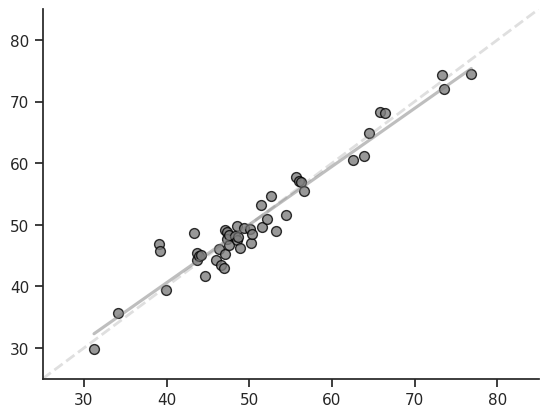

In [42]:
data_kfold_df = data_df.copy(deep=True)
data_kfold_df["ESOMO * BV(r=3)"] = data_kfold_df["ESOMO"] * data_kfold_df["BV(r=3)"]
data_kfold_selected_df = data_kfold_df.loc[:, ["RIP", "ESOMO", "BV(r=3)", "C-H BDE", "ΔGCu-III", "Red.", "VIP", "VEA", "ESOMO * BV(r=3)"]].copy()

X = np.array(data_kfold_selected_df.drop(['RIP'], axis=1))
Y = np.array(data_kfold_selected_df['RIP'])


loo = LeaveOneOut()
r2_scores = []
mae_scores = []
rmse_scores = []
Y_tests = np.array([])
Y_preds = np.array([])

for fold, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    Y_preds = np.append(Y_preds, Y_pred)
    Y_tests = np.append(Y_tests, Y_test)

print(f"{r2_score(Y_tests, Y_preds):.3f}")
print(f"{mean_absolute_error(Y_tests, Y_preds):.3f}")
print(f"{root_mean_squared_error(Y_tests, Y_preds):.3f}")

sns.set_theme(style="ticks")

g = sns.regplot(
    x=Y_tests, 
    y=Y_preds, 
    ci=None,

    scatter_kws={
        "alpha": 0.8,
        "color": "#7F7F7F",
        "label": "Prediction Data",
        "edgecolor": "black",
        "s": 50,
    },  
    line_kws={"color": "#7F7F7F", "linestyle": "-", "zorder": 2, "alpha":0.5},  # 设置回归线样式
)

g.plot([25, 85], [25, 85], color="grey", linestyle="--", linewidth=2, zorder=1, alpha=0.25)

g.set_xlim(25, 85)
g.set_ylim(25, 85)
g.set_xlabel("")
g.set_ylabel("")
sns.despine(g.figure)

g.figure.savefig("MLR_on_R_IP_all_components_revised_loo_cv.png", dpi=500, bbox_inches="tight")

In [43]:
model = LinearRegression()
model.fit(X, Y)
print(model.coef_)
print(model.intercept_)

[ 0.40715221  0.93858232  0.26736643 -0.28996162  9.0853647   0.83755718
  0.20599691  0.00911467]
-9.703620734618774
